# Masine sa vektorima podrske

## Linearna SVM klasifikacija

Osnovna ideja na kojoj se zasnivaju masine sa vektorima podrske je uklapanje u najsiru mogucu 'ulicu' izmedju klasa. Cilj je da se formira najsira moguca margina izmedju granice odlucivanja koja razdvaja dve klase i primera za obuku.

### Klasifikacija sa propustljivom marginom

Ako strogo zadamo da svi primeri moraju biti izvan ulice i na desnoj strani to se zove <i>klasifikacija sa cvrstom marginom</i>. Problem je u tome sto ova vrsta SVM-a radi samo kada su podaci linearno razdvojivi i osetljiva je na anomalije medju podacima.

Cilj <i>klasifikacije sa propustljivom marginom</i> je da pronadjemo dobar kompromis izmedju zadrzavanja sto vece sirine ulice i sto manjih povreda(narusavanja margine).

Hiperparametar C kontrolise povrede margine. Sto je C veci SVM pravi manje povreda, a sto je manji pravi vise povreda. Kada se model previse uklapa treba pokusati smanjiti C vrednost kako bi model vise generalizovao.

In [5]:
import matplotlib.pyplot as plt

def plot_svm(model, X, y):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  

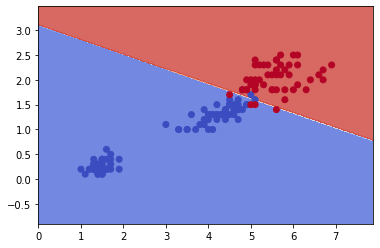

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)

plot_svm(svm_clf, X, y)

## Nelinearna SVM klasifikacija

Ideja kada imamo podatke koji nisu linearno razdvojivi je ista kao i kod linearne regresije, dodamo im polinomske clanove. To mozemo uraditi na dva nacina:
1. Manuelnim dodavanjem
2. Koriscenjem polinomskog jezgra

/home/dujapc/ml/ml_env/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


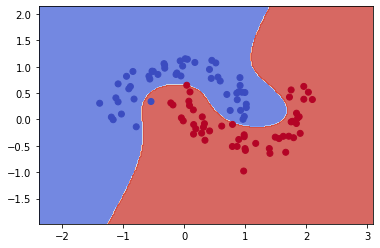

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm = Pipeline([
  ('poly_features', PolynomialFeatures(degree=3)),
  ('scaler', StandardScaler()),
  ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

polynomial_svm.fit(X, y)

plot_svm(polynomial_svm, X, y)

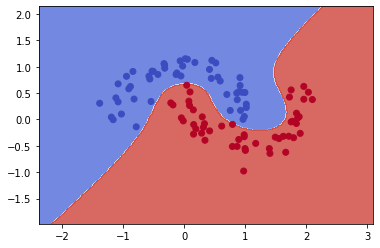

In [8]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm_clf', SVC(kernel='poly', degree=3, C=10, coef0=1))
])

poly_kernel_svm_clf.fit(X, y)
plot_svm(poly_kernel_svm_clf, X, y)

### Svojstva slicnosti

Jos jedna tenika za obucavanje nelinearnih problema je dodavanje novih svojstava cije crednosti izracunate pomocu odredjene funkcije slicnosti.

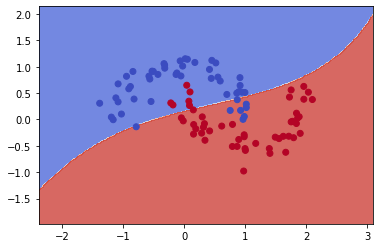

In [9]:
rbf_kernel_svm_clf = Pipeline([
  ('sclaer', StandardScaler()),
  ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=1))
])


rbf_kernel_svm_clf.fit(X, y)
plot_svm(rbf_kernel_svm_clf, X, y)

Povecavanje vrednosti gamma cini da uticaj svakog primera postaje uzi: granica odlucivanja postaje neravnomernija i krivuda oko pojedinacnih primera

## SVM regresija

Da bi se SVM algoritam upotrebio za regresiju trik se sastoji u zameni cilja umesto da pokusava da umetne sto siru ulicu izmedju dve klase, a da istovremeno ogranici broj prekoracivanje margine, SVM regresija pokusava da umetne sto vise primera unutar ulice uz ogranicavanje broja prekoracenja margine. Sirinu ulice odredjuje parameta $\epsilon$

In [10]:
mnist = datasets.fetch_openml('mnist_784', version=1)

In [11]:
X, y = mnist['data'], mnist['target']

In [16]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:50000], X[50000:60000], X[60000:], y[:50000], y[50000:60000], y[60000:]
X_param_test, y_param_test = X[:5000], y[:5000]

In [13]:
svm_clf = Pipeline([
  ('scaler', StandardScaler()),
  ('svm', SVC())
])

svm_clf.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC())])

In [18]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')
score

array([0.95614088, 0.95938081, 0.95391816])

In [17]:
score

array([0.92621476, 0.92469247, 0.9429943 ])